### IRIS 데이터를 활용한 DBSCAN 군집화

In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [135]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# DBSCAN 모델 생성 및 예측
model = DBSCAN(eps=0.3, min_samples=6)
# eps 와 min_samples 의 변수를 데이터의 특성에 맞게끔 조절해줘야 DBSCAN의 성능을 보장됨
# 보통 min_samples 수는 입력변수의 차원+1 혹은 그보다 크게 조정한다.
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# 출력변수(prediction)을 새로운 컬럼으로 추가
r = pd.concat([feature, predict], axis=1)
r.head()

,Sepal length,Sepal width,Petal length,Petal width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 실제데이터와 DBSCAN 군집화 결과 비교

- 실제데이터 시각화

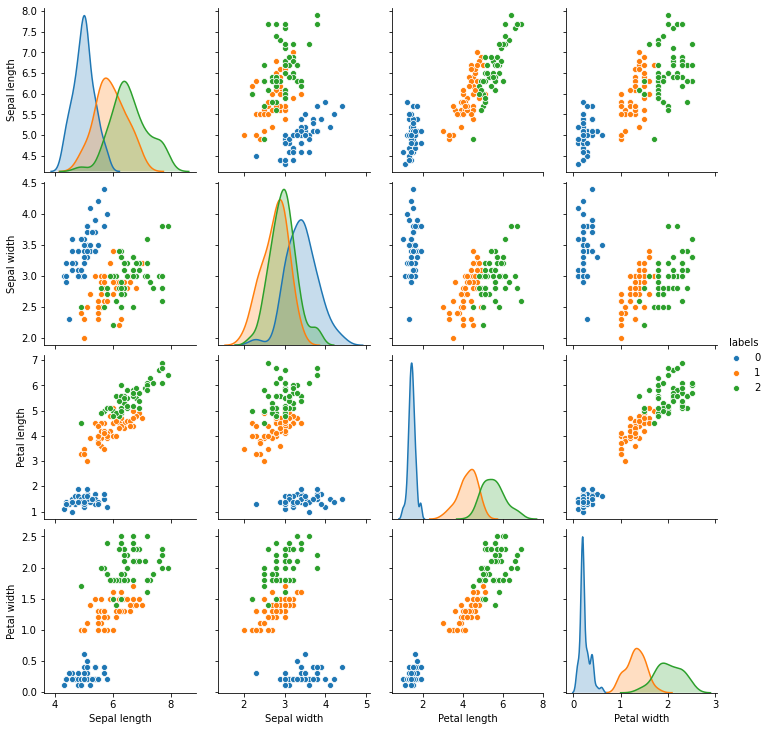

In [11]:
sns.pairplot(data, hue='labels')
plt.show()

- DBSCAN 결과 시각화

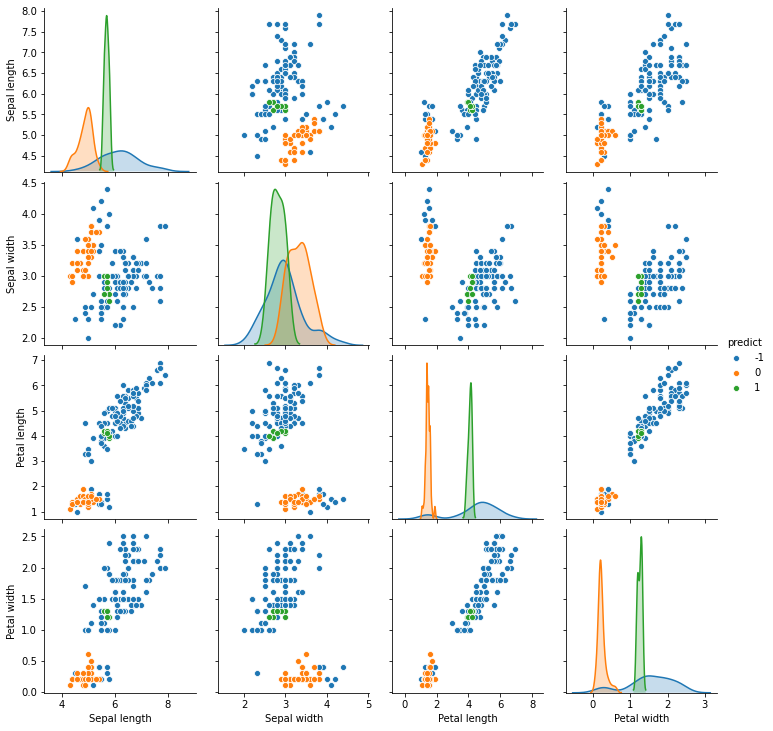

'\nDBSCAN 군집화 결과가 좋게 나오지 않는데, 고밀도를 가지는 패턴이 있는 데이터에 적용했을 때 DBSCAN 기법의 성능이 보장된다. \n'

In [20]:
sns.pairplot(r, hue='predict')
plt.show()
"""
DBSCAN 군집화 결과가 좋게 나오지 않는데, 고밀도를 가지는 패턴이 있는 데이터에 적용했을 때 DBSCAN 기법의 성능이 보장된다. 
""" 

**밀도를 가지는 패턴의 데이터에 KMeans, DBSCAN 군집화 적용 및 비교**

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [71]:
data = np.load('./data/clusterable_data.npy')

In [72]:
data.shape

(2309, 2)

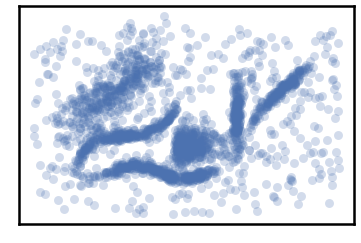

In [73]:
# 데이터 시각화
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [105]:
# 군집화 알고리즘과 데이터를 입력받아 시각화 하는 함수
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=14)
    plt.text(-0.50, 0.65, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=10)

- KMeans 군집화 적용

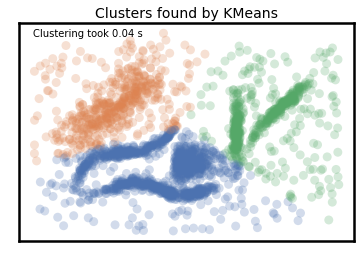

In [106]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

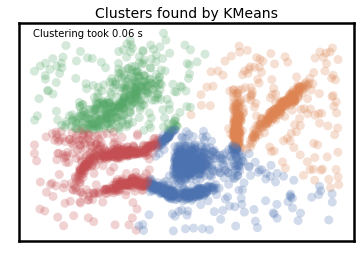

In [107]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4})

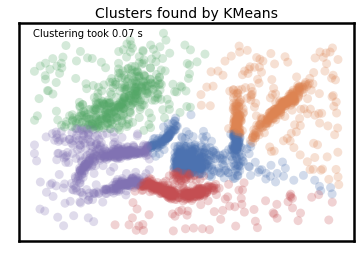

In [108]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})

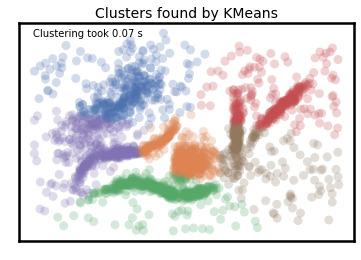

In [109]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

- DBSCAN 군집화 적용

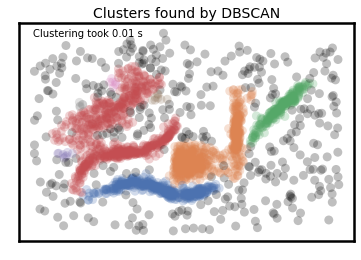

In [110]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

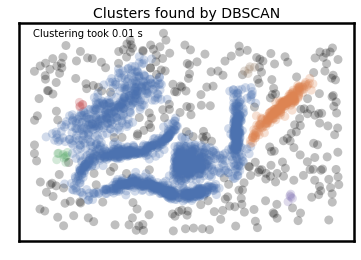

In [113]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.03})
# eps 값이 0.05 커질 경우, 군집시키는 반경이 크기때문에 더 많은 데이터가 군집화되고 군집 수는 감소한다.

In [115]:
# 각 데이터별로 할당된 군집의 라벨을 확인가능함
dbs = DBSCAN(eps=0.03)
dbs2 = dbs.fit(data)

dbs2.labels_

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

### DBSCAN 의 발전 : "H-DBSCAN"
- DBSCAN의 하이퍼파라미터인 eps, min_samples 에 덜 민감하다.

In [119]:
# !pip install hdbscan
import hdbscan

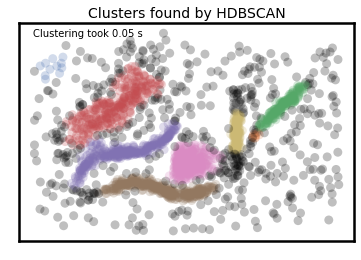

In [133]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':10})
# min_cluster_size 의 변수는 군집화에 포함될 최소한의 데이터수